In [1]:
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
from scipy.spatial import distance
import matplotlib.pyplot as plt
ep=10
import math
import itertools

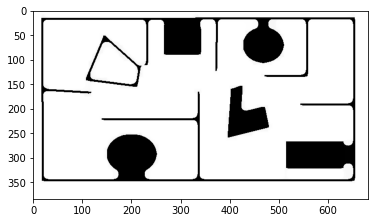

In [46]:
#assuming the robot is circular in shape
def configspace(img,L):
    circle=np.zeros([2*L,2*L,3],dtype=np.uint8)
    circle=cv2.circle(circle,(L,L), L, (255,255,255), -1)
    struct_element=cv2.cvtColor(circle, cv2.COLOR_BGR2GRAY)
    struct_element[struct_element>0]=1
    # plt.imshow(struct_element.astype(np.uint8))
    # print(struct_element)
    closing = cv2.morphologyEx(img, cv2.MORPH_OPEN, struct_element)
    return closing

img=cv2.imread("/content/maze.png")
# plt.imshow(img.astype(np.uint8))
closed=configspace(img, 10)
plt.imshow(closed.astype(np.uint8))


In [53]:
def rrt_holon(img, t1, t2):
    ep=10
    config=configspace(img,20) #updated obstacles
    for i in range(100):
        available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        qRand = available[np.random.randint(0,len(available))]
#         qRand = [100,20]
#         t1t = t1.copy()
#         t1t -= qRand
#         t1t = t1t ** 2
#         tsum = []
#         for x,y in t1t:
#             tsum.append(x + y)
#         tsum = np.asarray(tsum)


        calc = distance.cdist(t1,[qRand])
        qNear = t1[np.argmin(calc)]
        u = qRand - qNear
        if np.linalg.norm(u) == 0: continue
        v = u / np.linalg.norm(u)
        qNew = qNear + ep*v
        qNew = np.asarray(qNew,dtype=np.int64) 
        imgcpy = img.copy()
        prevobs = np.sum(np.all(config == (0,0,0), axis=2))
        cv2.line(config,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
#         newline = np.array(np.where((imgcpy == [0, 0, 255]).all(axis = 2))).T
#         flg = 1
        newobs = np.sum(np.all(config == (0,0,0), axis=2))
        if prevobs == newobs:
            cv2.line(img,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
            t1 = np.vstack([t1,qNew])
#             available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        plt.imshow(img.astype(np.uint8))
        if np.min(distance.cdist(t1,t2)) < 10 : 
            break
        

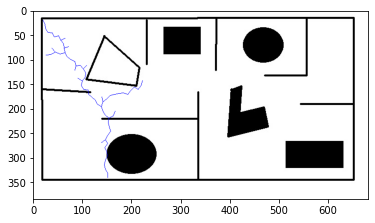

In [52]:
t1 = [[20,20]]
t2 = [[600,150]]
t1 = np.asarray(t1)
t2 = np.asarray(t2)
img = 255*np.ones((200,200,3))
img1 = cv2.imread("untitled.png")
cv2.line(img,(25,15),(25,175),(0,0,0),2)
img1=cv2.imread("/content/maze.png")
# available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
rrt_holon(img1,t1,t2)

In [13]:
def rrt_nonholon(img, t1, t2):
    init_theta=0
    del_t=1
    for i in range(500):
        available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        qRand = available[np.random.randint(0,len(available))]
        calc = distance.cdist(t1,[qRand])
        qNear = t1[np.argmin(calc)]

        v, w = [-5, 5], [-math.pi/15, 0, math.pi/15]
        controls = list(itertools.product(v, w))
        max_dist = np.inf
        theta = 0
        qNew=[0,0]

        for crtl in controls:
            v1, w1 = crtl
            temp = [qNear[0] + v1*del_t*math.cos(init_theta + w1*del_t) , qNear[1] + v1*del_t*math.sin(init_theta + w1*del_t)]
            dist = np.linalg.norm(np.array(qRand)-np.array(temp))
            if dist < max_dist:
                qNew = temp
                theta = (init_theta + w1*del_t)
                max_dist = dist
        init_theta=theta
        qNew = np.asarray(qNew,dtype=np.int64)

        imgcpy = img.copy()
        prevobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        cv2.line(imgcpy,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))

        newobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        if prevobs == newobs:
            cv2.line(img,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
            t1 = np.vstack([t1,qNew])

        plt.imshow(img.astype(np.uint8))
        if np.min(distance.cdist(t1,t2)) < 10 : 
            break

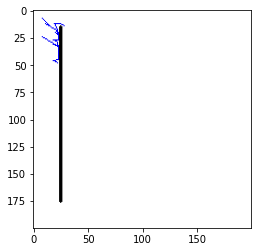

In [14]:
t1 = [[20,20]]
t2 = [[600,150]]
t1 = np.asarray(t1)
t2 = np.asarray(t2)
img = 255*np.ones((200,200,3))
#img1 = cv2.imread("untitled.png")
cv2.line(img,(25,15),(25,175),(0,0,0),2)
# plt.imshow(img1)
# available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
rrt_nonholon(img,t1,t2)